In [23]:
import pandas as pd


db = pd.read_json('../Data.json', lines=True)

db.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [24]:
# Check the number of rows and columns
print(f"Number of rows: {db.shape[0]}")
print(f"Number of columns: {db.shape[1]}")
print("columns:")
db.dtypes

Number of rows: 10261
Number of columns: 9
columns:


reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [25]:
db.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [26]:
# check nan values
print("nan values:")
print(db.isna().sum())


nan values:
reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


In [27]:
# check if the number of asin is equal to the number of rows
print(f"Number of unique asin: {db.asin.nunique()}")
print(f"Number of unique reviewerName: {db.reviewerName.nunique()}")

Number of unique asin: 900
Number of unique reviewerName: 1397


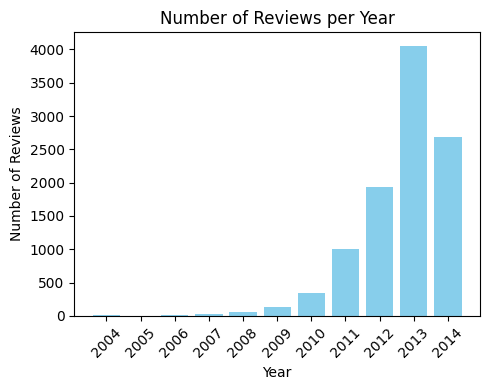

In [28]:
import matplotlib.pyplot as plt

# Plotting the number of reviews per year
year = pd.to_datetime(db['reviewTime']).dt.year
year_counts = year.value_counts().sort_index()
plt.figure(figsize=(5, 4))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.xticks(year_counts.index, rotation=45)
plt.tight_layout()
plt.show()

Rating counts:
overall
1     217
2     250
3     772
4    2084
5    6938
Name: count, dtype: int64


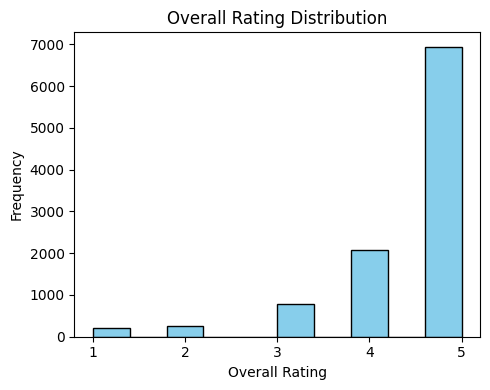

In [31]:
# check the balance of the rating
rating_counts = db['overall'].value_counts().sort_index()
print("Rating counts:")
print(rating_counts)


#plotting the overall rating distribution
plt.figure(figsize=(5, 4))
plt.hist(db['overall'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Overall Rating Distribution')
plt.xticks(range(1,6))
plt.tight_layout()
plt.show()

In [33]:
# create a new column for sentiment
def sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'
    
db['sentiment'] = db['overall'].apply(sentiment)
db

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",positive
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",positive


In [37]:
tempdb = db.drop(columns=['reviewerName', 'reviewTime', 'summary', 'unixReviewTime','helpful'])
tempdb	

,reviewerID,asin,reviewText,overall,sentiment
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5,positive
1,A14VAT5EAX3D9S,1384719342,The product does exactly as it should and is q...,5,positive
2,A195EZSQDW3E21,1384719342,The primary job of this device is to block the...,5,positive
3,A2C00NNG1ZQQG2,1384719342,Nice windscreen protects my MXL mic and preven...,5,positive
4,A94QU4C90B1AX,1384719342,This pop filter is great. It looks and perform...,5,positive
...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"Great, just as expected. Thank to all.",5,positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,I've been thinking about trying the Nanoweb st...,5,positive
10258,AWCJ12KBO5VII,B00JBIVXGC,I have tried coated strings in the past ( incl...,4,positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Well, MADE by Elixir and DEVELOPED with Taylor...",4,positive


In [ ]:
# preprocess the text data